In [11]:
import pickle
import matplotlib.pyplot as plt
ct_idx = 3
volume_dim = 6

root_dir = 'db'
with open(f'{root_dir}/sample_{ct_idx}/two_p_data_{volume_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    twp_p_results = pickle.load(file)

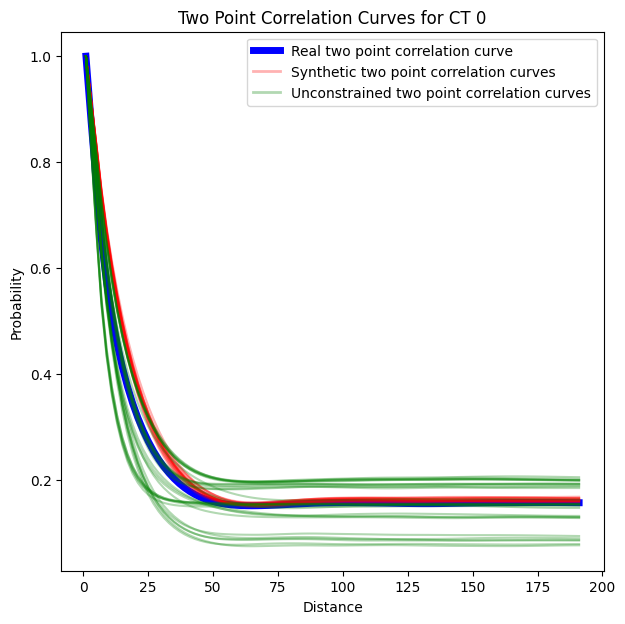

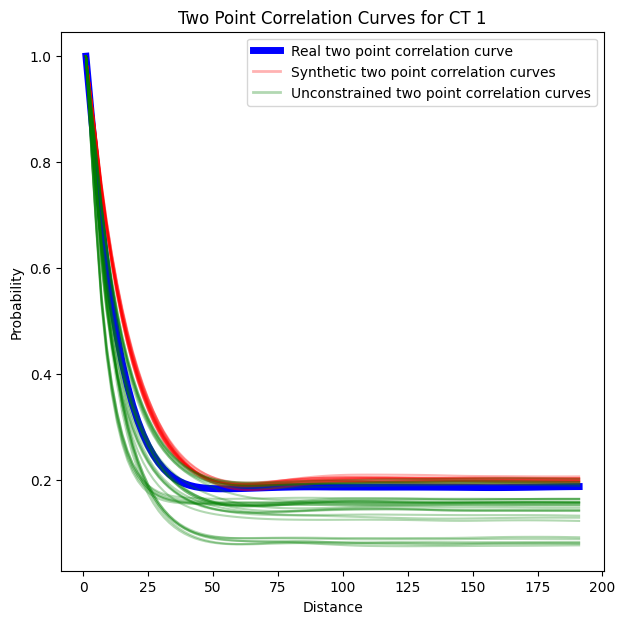

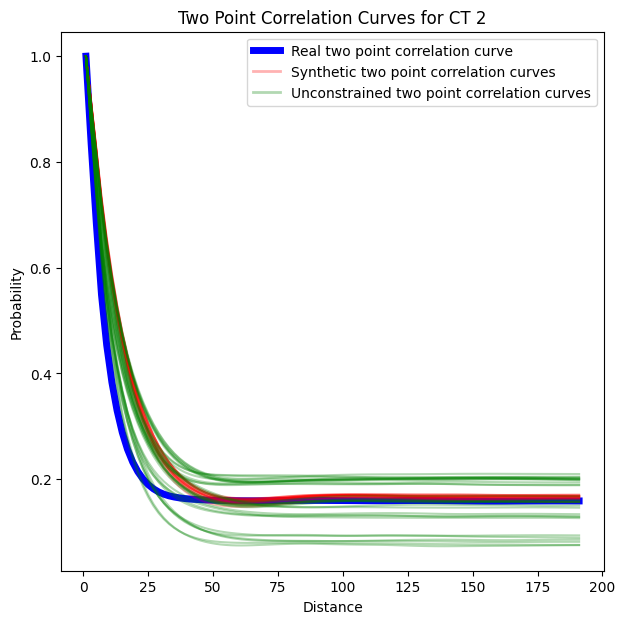

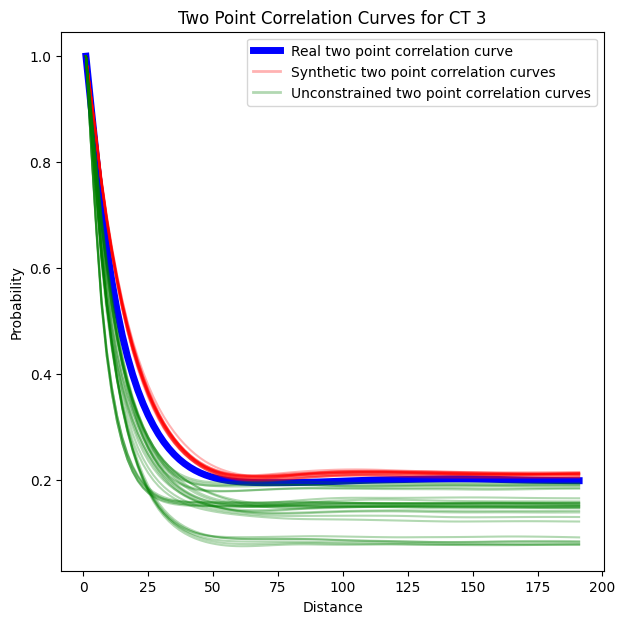

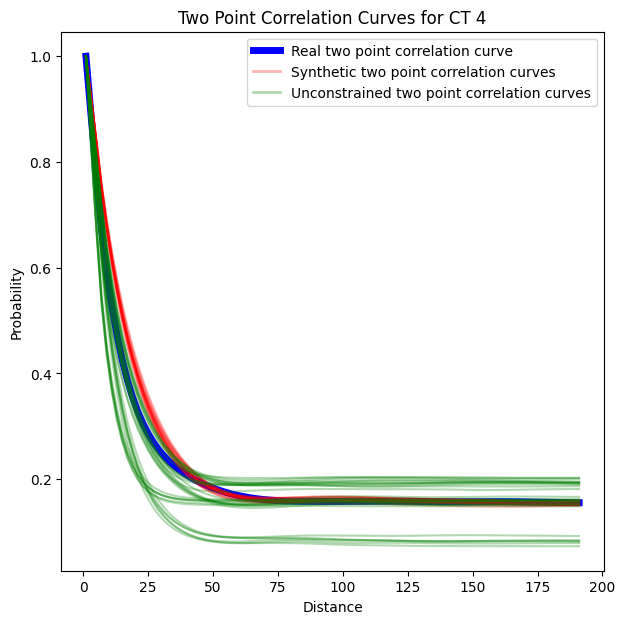

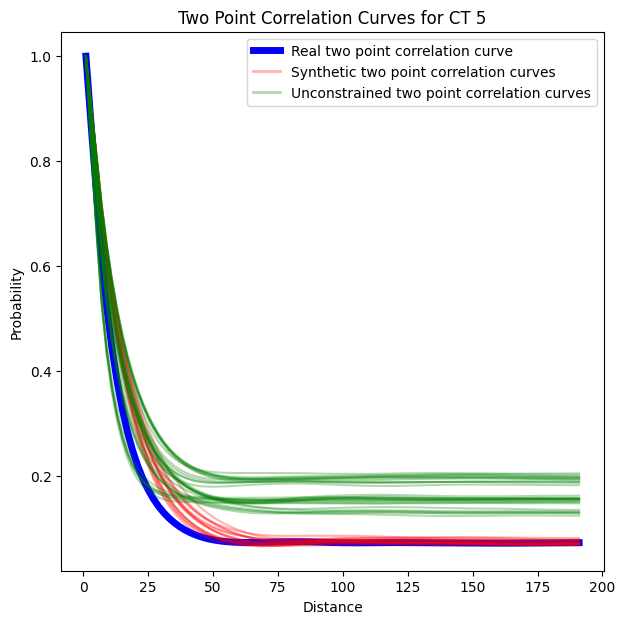

In [12]:
root_dir = 'db'
volume_dim = 6
sample_idx = 0

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/two_p_data_{volume_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        twp_p_results = pickle.load(file)

    two_p = twp_p_results[sample_idx]
    num_pred = len(two_p['pred'])
    num_compare = len(two_p['compare'])

    pred = two_p['pred']
    compare = two_p['compare']
    real = two_p['real']

    f = plt.figure(figsize=(7, 7))

    # Plotting real data
    plt.plot(real.distance, real.probability, label='Real', color='blue', linewidth=5)

    # Plotting prediction data
    for i in range(num_pred):
        plt.plot(pred[i].distance, pred[i].probability, color='red', alpha=0.3, label='Prediction' if i == 0 else "")

    # Plotting compare (reference) data
    for i in range(num_compare):
        plt.plot(compare[i].distance, compare[i].probability, color='green', alpha=0.3, label='Reference' if i == 0 else "")

    # Adding a manual legend
    plt.legend(handles=[
        plt.Line2D([0], [0], color='blue', linewidth=5, label='Real two point correlation curve'),
        plt.Line2D([0], [0], color='red', alpha=0.3, linewidth=2, label='Synthetic two point correlation curves'),
        plt.Line2D([0], [0], color='green', alpha=0.3, linewidth=2, label='Unconstrained two point correlation curves')
    ], loc='best')
    
    plt.xlabel('Distance')
    plt.ylabel('Probability')
    plt.title(f'Two Point Correlation Curves for CT {ct_idx}')
    plt.show()

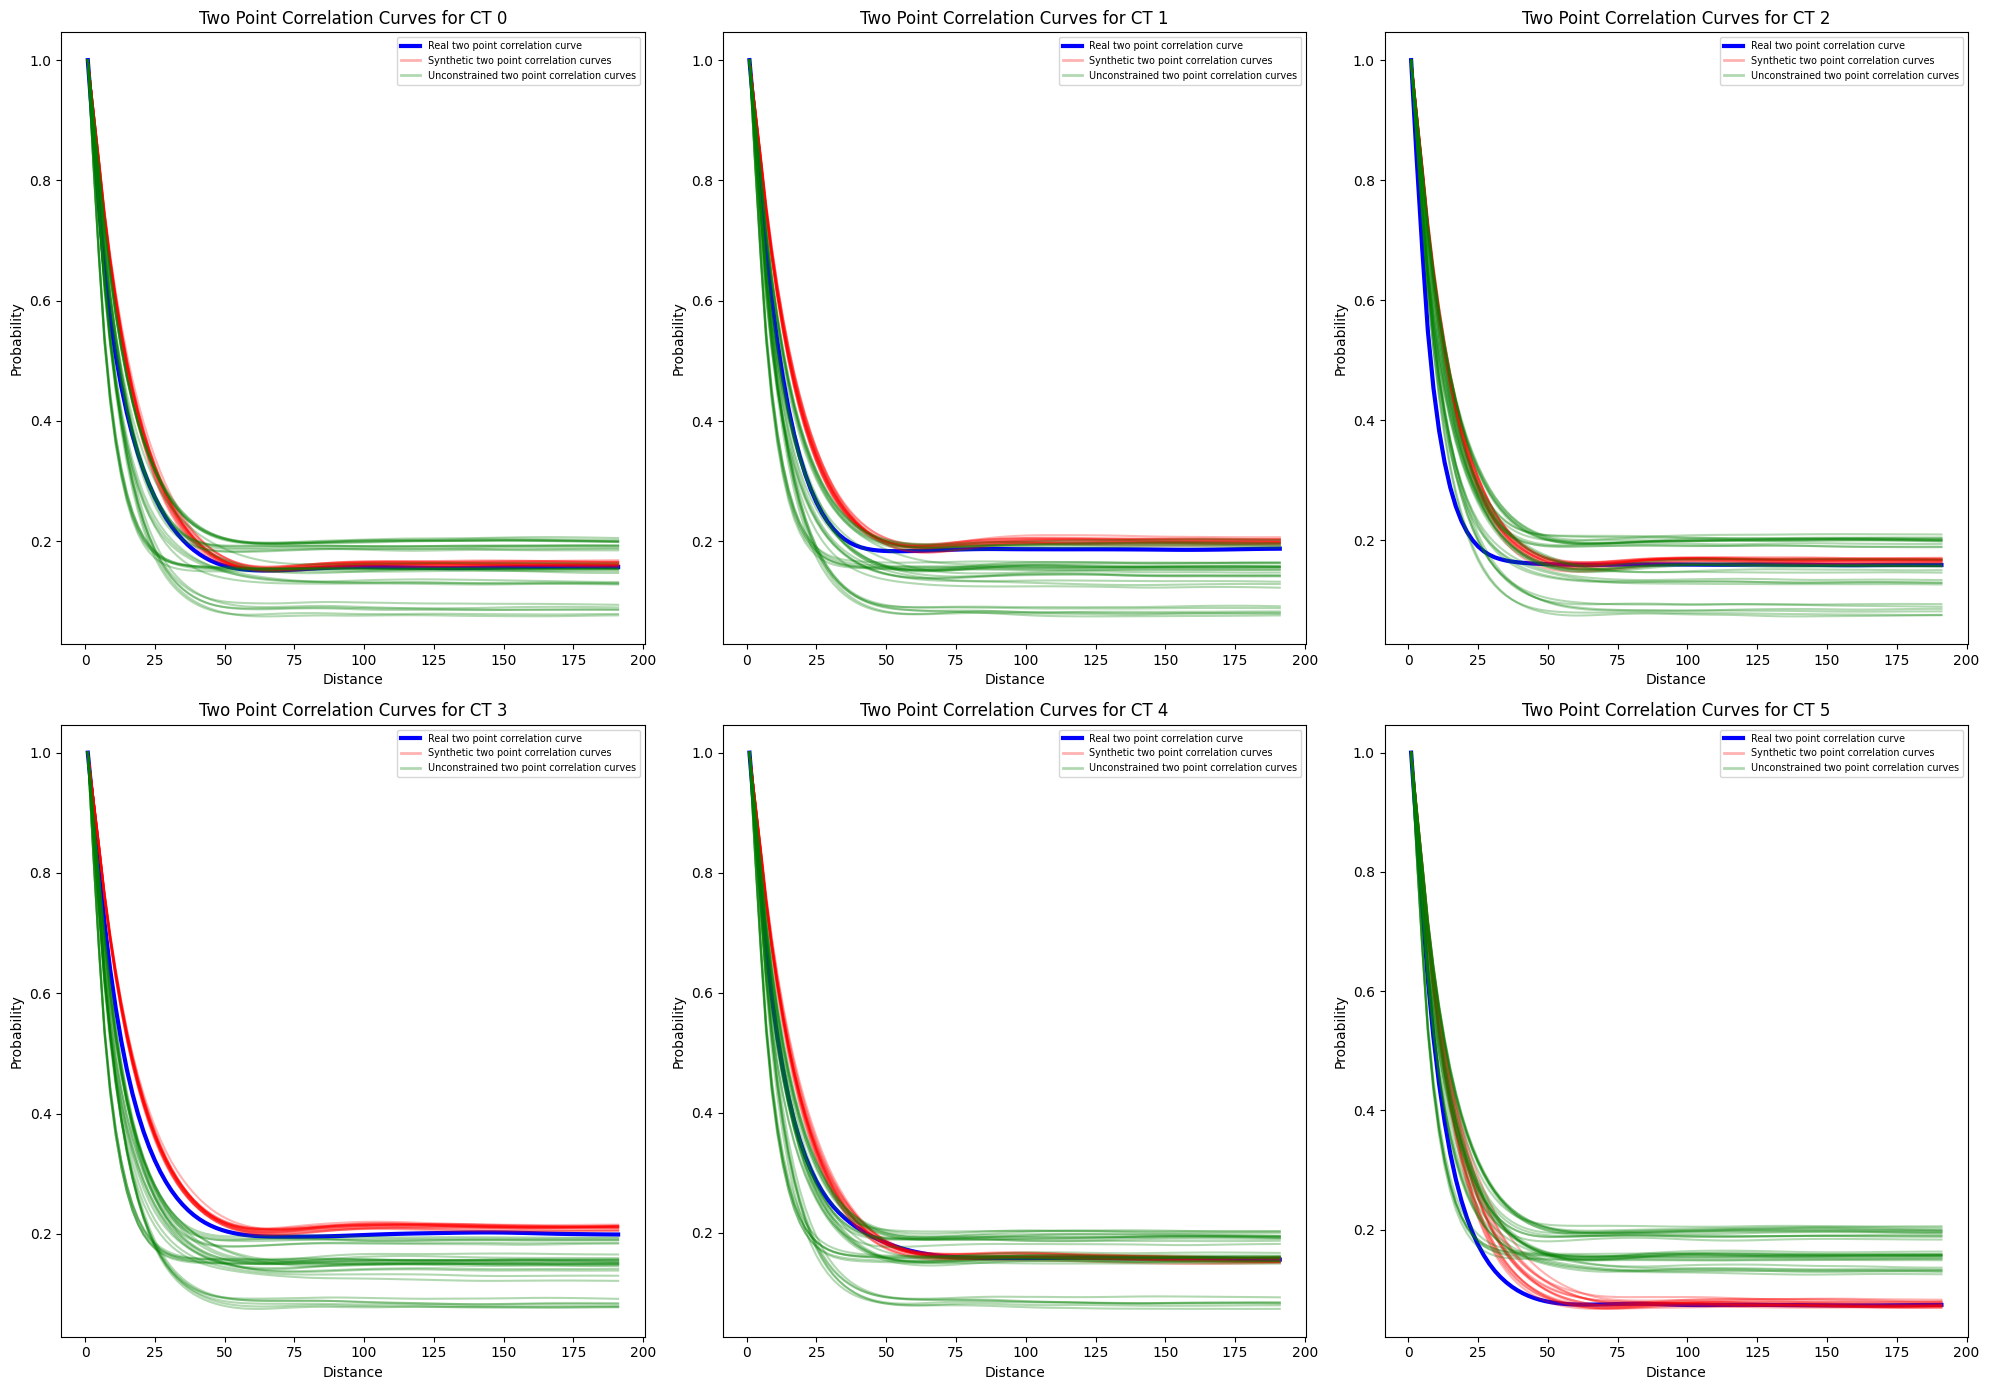

In [13]:
import matplotlib.pyplot as plt
import pickle

def plot_subplot(ax, two_p, ct_idx):
    num_pred = len(two_p['pred'])
    num_compare = len(two_p['compare'])

    pred = two_p['pred']
    compare = two_p['compare']
    real = two_p['real']

    # Plotting real data
    ax.plot(real.distance, real.probability, color='blue', linewidth=3)

    # Plotting prediction data
    for i in range(num_pred):
        ax.plot(pred[i].distance, pred[i].probability, color='red', alpha=0.3)

    # Plotting compare (reference) data
    for i in range(num_compare):
        ax.plot(compare[i].distance, compare[i].probability, color='green', alpha=0.3)

    ax.set_xlabel('Distance')
    ax.set_ylabel('Probability')
    ax.set_title(f'Two Point Correlation Curves for CT {ct_idx}')
    
    # Add legend to each subplot
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='Real two point correlation curve'),
        plt.Line2D([0], [0], color='red', alpha=0.3, linewidth=2, label='Synthetic two point correlation curves'),
        plt.Line2D([0], [0], color='green', alpha=0.3, linewidth=2, label='Unconstrained two point correlation curves')
    ]
    ax.legend(handles=handles, loc='best', fontsize='x-small')

def plot_grid():
    root_dir = 'db'
    volume_dim = 6
    sample_idx = 0

    fig, axs = plt.subplots(2, 3, figsize=(20, 14))
    axs = axs.flatten()  # Flatten the 2D array of axes to make indexing easier

    for ct_idx in range(6):
        with open(f'{root_dir}/sample_{ct_idx}/two_p_data_{volume_dim}.pickle', 'rb') as file:
            twp_p_results = pickle.load(file)

        two_p = twp_p_results[sample_idx]
        plot_subplot(axs[ct_idx], two_p, ct_idx)

    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_grid()

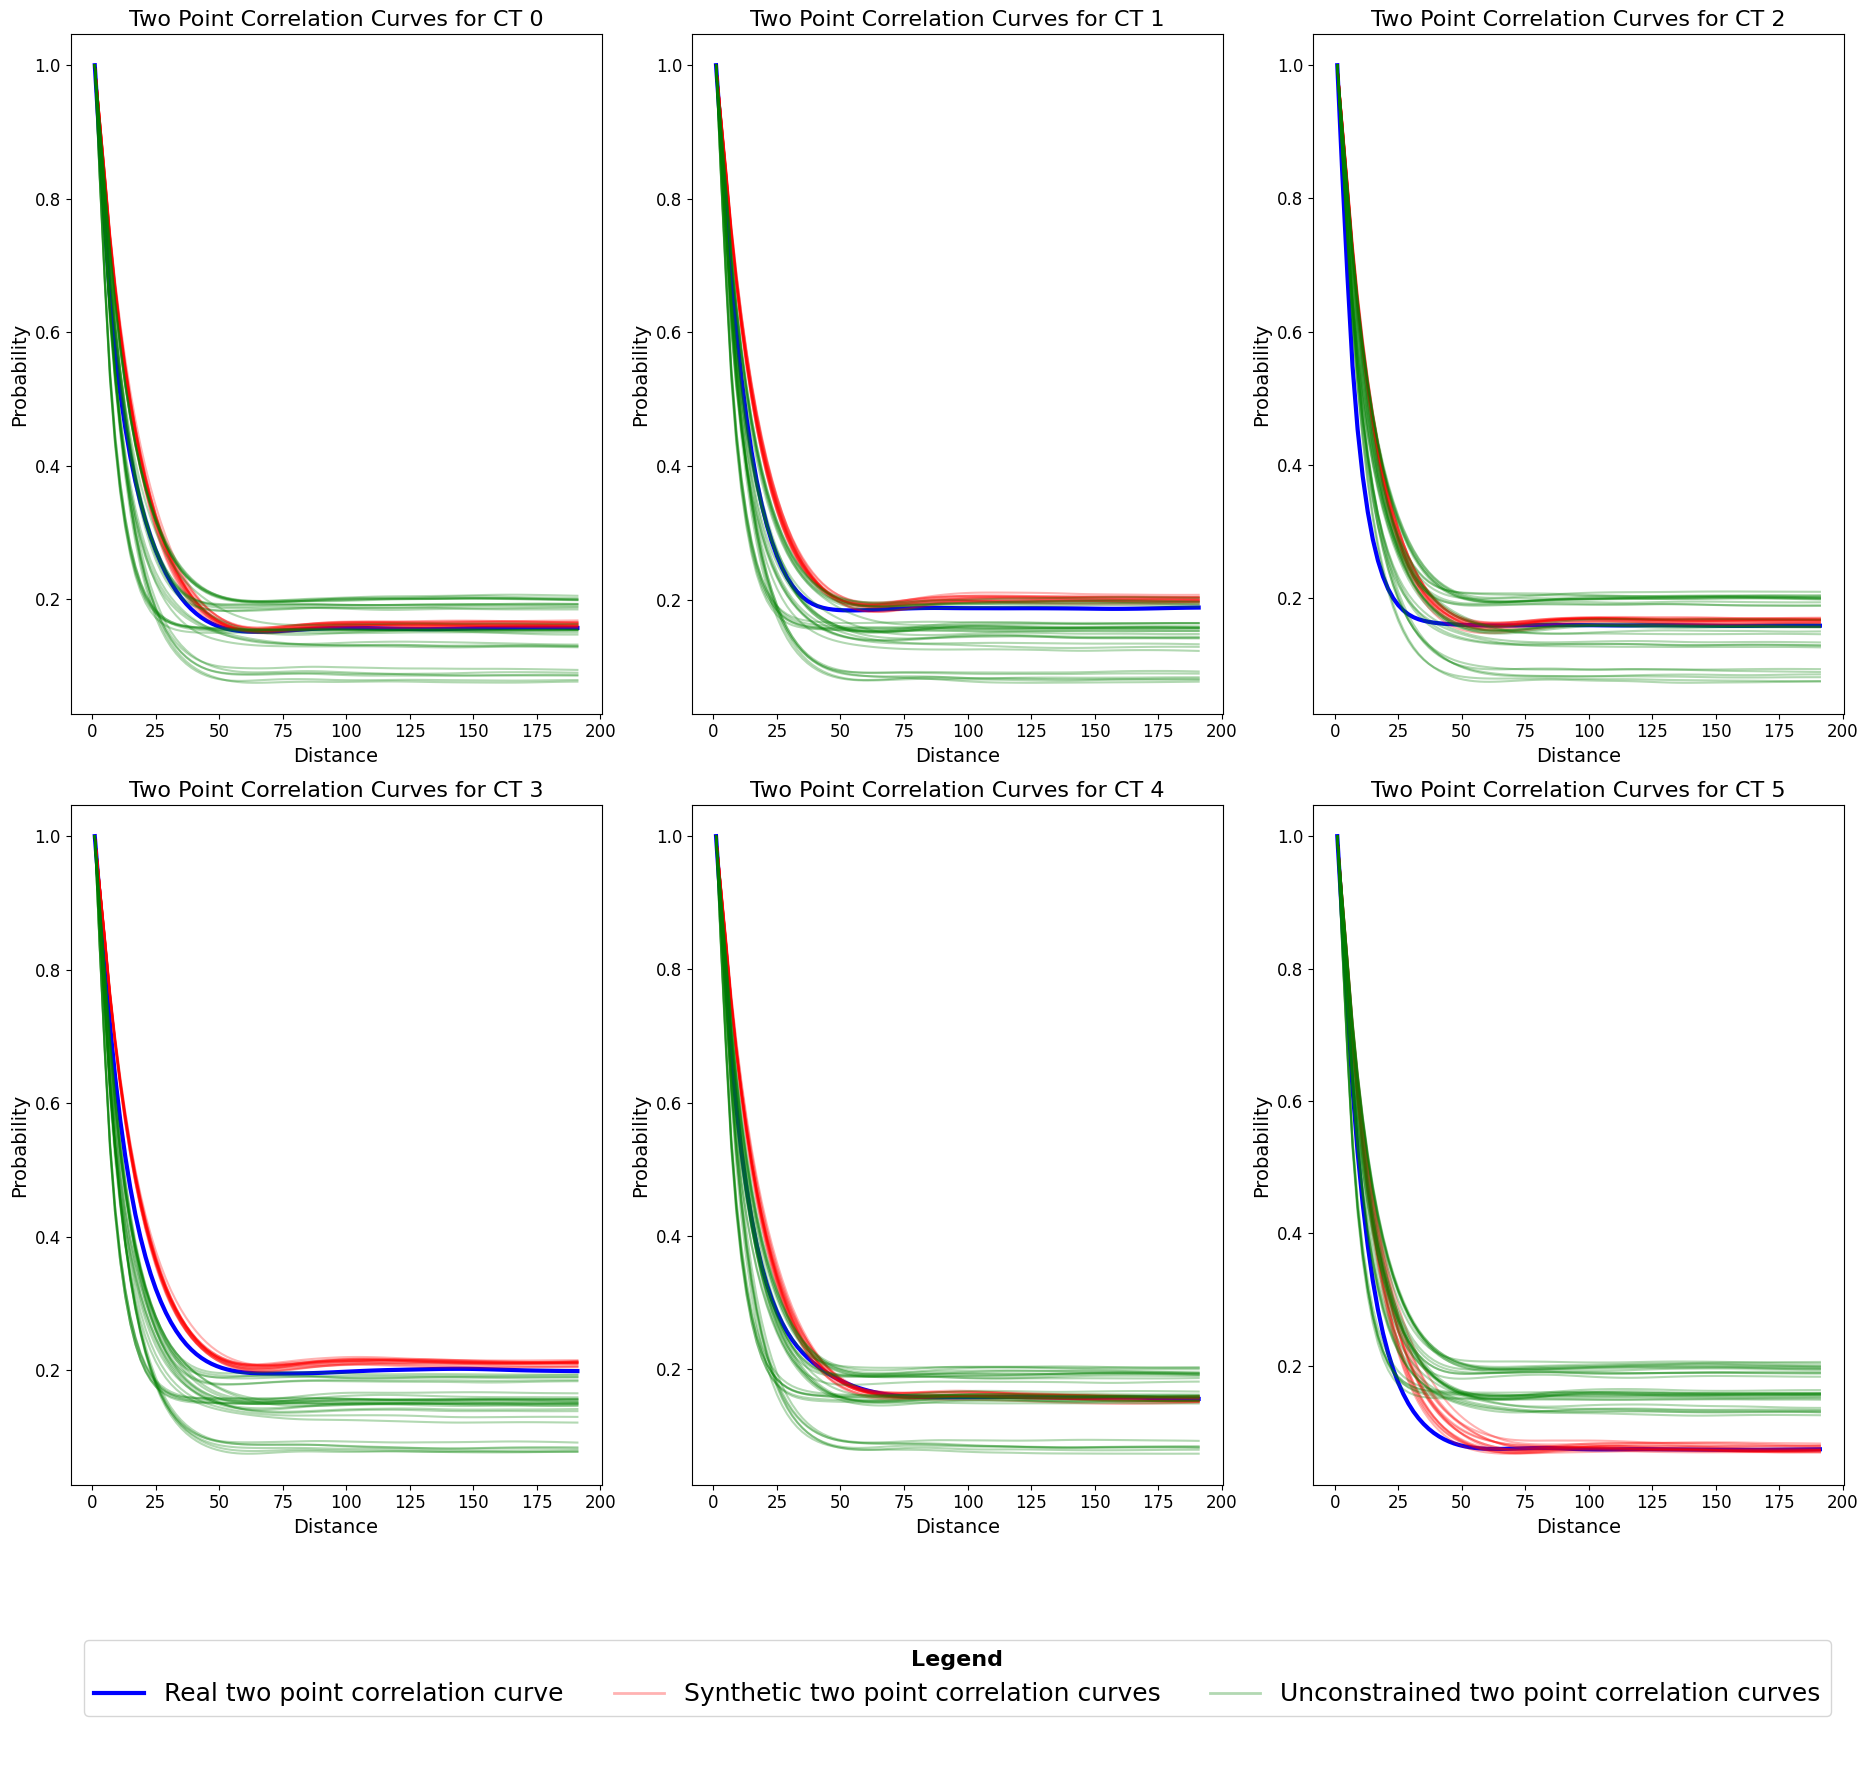

In [17]:
import matplotlib.pyplot as plt
import pickle

def plot_subplot(ax, two_p, ct_idx):
    num_pred = len(two_p['pred'])
    num_compare = len(two_p['compare'])

    pred = two_p['pred']
    compare = two_p['compare']
    real = two_p['real']

    # Plotting real data
    ax.plot(real.distance, real.probability, color='blue', linewidth=3)

    # Plotting prediction data
    for i in range(num_pred):
        ax.plot(pred[i].distance, pred[i].probability, color='red', alpha=0.3)

    # Plotting compare (reference) data
    for i in range(num_compare):
        ax.plot(compare[i].distance, compare[i].probability, color='green', alpha=0.3)

    ax.set_xlabel('Distance', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.set_title(f'Two Point Correlation Curves for CT {ct_idx}', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plot_grid():
    root_dir = 'db'
    volume_dim = 6
    sample_idx = 0

    fig = plt.figure(figsize=(20, 18))  # Slightly increased figure height
    gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.3])  # Increased bottom row height ratio

    for ct_idx in range(6):
        ax = fig.add_subplot(gs[ct_idx // 3, ct_idx % 3])
        with open(f'{root_dir}/sample_{ct_idx}/two_p_data_{volume_dim}.pickle', 'rb') as file:
            twp_p_results = pickle.load(file)

        two_p = twp_p_results[sample_idx]
        plot_subplot(ax, two_p, ct_idx)

    # Create legend
    legend_ax = fig.add_subplot(gs[2, :])
    legend_ax.axis('off')
    
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='Real two point correlation curve'),
        plt.Line2D([0], [0], color='red', alpha=0.3, linewidth=2, label='Synthetic two point correlation curves'),
        plt.Line2D([0], [0], color='green', alpha=0.3, linewidth=2, label='Unconstrained two point correlation curves')
    ]
    legend = legend_ax.legend(handles=handles, loc='center', ncol=3, fontsize=18, title='Legend')
    legend.get_title().set_fontweight('bold')
    legend.get_title().set_fontsize(16)

    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_grid()